In [35]:
%%capture 
%run receptor_tools.ipynb

# Reduced Graph Powers

For a receptor model given by state-transition diagram  {math}`G`, the state-transition diagram for the dimer is the reduced graph power {math}`G^{(2)}`.   This expanded state-transition diagram for the receptor dimer can be created in `Sagemath`  by constructing the Cartesian product {math}`G \Box G` by merging vertices that are equivalent up to symmetry.

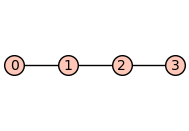

In [26]:
G = graphs.PathGraph(4)
G.show(figsize=2)

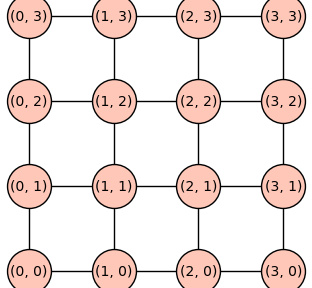

In [27]:
GG = G.cartesian_product(G)
pos = {v: v for v in GG.vertices(sort=True)}
GG.set_pos(pos)
GG.show(figsize=4,vertex_size=1000)

The following code block merges vertices of the Cartesian product graph {math}`G \Box G` \(`GG`\) to produce the reduced graph power {math}`G^{(2)}` \(`G2`\). 


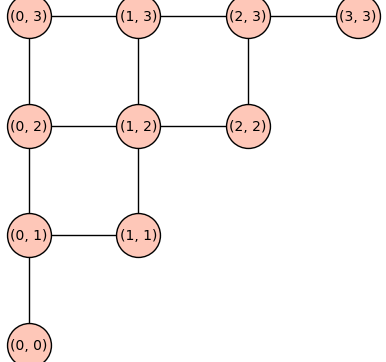

In [28]:
G2 = GG.copy()
for v in G2.vertices(sort=True):
    for u in G2.vertices(sort=True):
        sv=tuple(sorted(v))
        su=tuple(sorted(u))
        if v!=u and sv==su and v<u and G2.has_vertex(v) and G2.has_vertex(u):
            G2.merge_vertices([v,u])
G2.show(figsize=5,vertex_size=1000)

In [29]:
def Cartesian_power(G=Graph(), k=2):
    # Make Cartesian power G^k (unreduced)
    Gk=G.copy()
    for i in range(k-1):
        Gk = Gk.cartesian_product(G)
    # Make each vertex a tuple
    vflat=list(range(Gk.order()));
    for i in range(Gk.order()):
        v=Gk.vertices(sort=True)[i]
        vflat[i]=tuple(flatten(v))
    Gk.relabel(vflat)
    return Gk

Return the **Cartesian power** of the graph `G`. Or ``G``.

INPUT:

- ``G`` -- graph; the description of the
  argument ``x`` goes here. If it contains multiple lines, all
  lines after the first need to begin at the same indentation
  as the backtick.

- ``k`` -- (default: 2 yields the model receptor dimer).

OUTPUT: The reduced Cartesian square ``Gk``.

EXAMPLES:

This example illustrates ... ::

    sage: A = ModuliSpace()
    sage: A.point(2,3)



In [30]:
def reduced_Cartesian_power(G=Graph(), k=2):
    r"""
    Return the **reduced Cartesian power** of the graph `G`. Or ``G``.

    INPUT:

    - ``G`` -- graph; the description of the
      argument ``x`` goes here. If it contains multiple lines, all
      the lines after the first need to begin at the same indentation
      as the backtick.

    - ``k`` -- (default: 2 yields the model receptor dimer).

    OUTPUT: The reduced Cartesian square ``Gk``.

    EXAMPLES:

    This example illustrates ... ::

        sage: A = ModuliSpace()
        sage: A.point(2,3)
    """
    Gk = Cartesian_power(G, k)
    for v in Gk.vertices(sort=True):
        for u in Gk.vertices(sort=True):
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and Gk.has_vertex(v) and Gk.has_vertex(u):
                Gk.merge_vertices([v,u])
    return Gk

mydoc(reduced_Cartesian_power)

**`reduced_Cartesian_power(G=Graph on 0 vertices, k=2)`**

Return the **reduced Cartesian power** of the graph `G`. Or ``G``.

INPUT:

- ``G`` -- graph; the description of the
  argument ``x`` goes here. If it contains multiple lines, all
  the lines after the first need to begin at the same indentation
  as the backtick.

- ``k`` -- (default: 2 yields the model receptor dimer).

OUTPUT: The reduced Cartesian square ``Gk``.

EXAMPLES:

This example illustrates ... ::

    sage: A = ModuliSpace()
    sage: A.point(2,3)

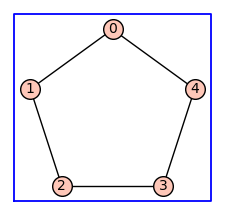

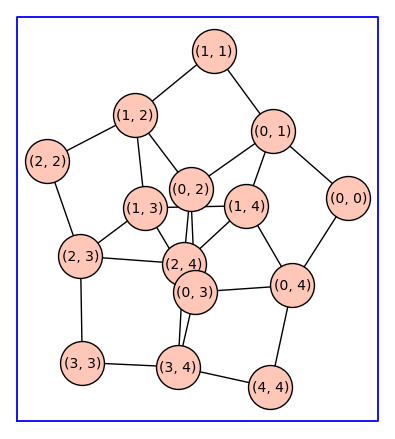

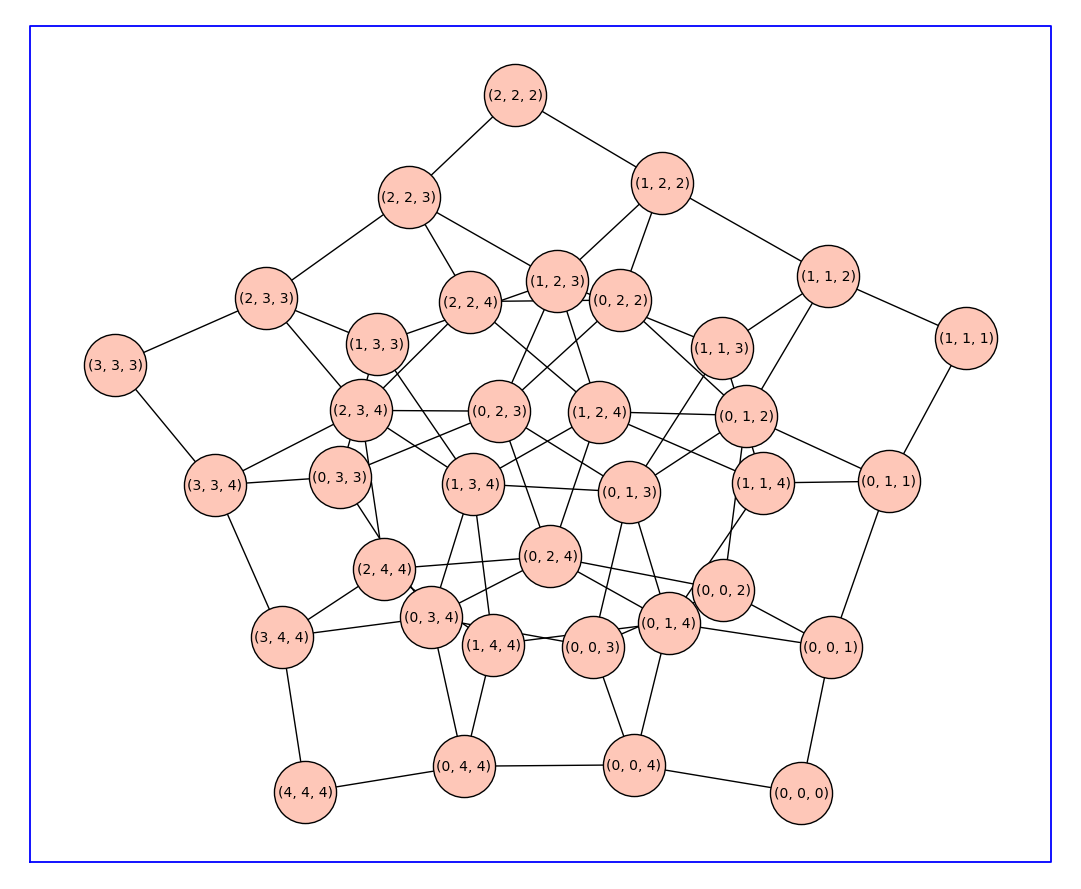

In [31]:
G = graphs.CycleGraph(5)
G.show(figsize=3,graph_border=True)
G2 = reduced_Cartesian_power(G)
G2.show(figsize=6,vertex_size=1000,graph_border=True)
G3 = reduced_Cartesian_power(G,3)
G3.show(figsize=12,vertex_size=2000,graph_border=True)

In [32]:
mydoc(reduced_Cartesian_power)

**`reduced_Cartesian_power(G=Graph on 0 vertices, k=2)`**

Return the **reduced Cartesian power** of the graph `G`. Or ``G``.

INPUT:

- ``G`` -- graph; the description of the
  argument ``x`` goes here. If it contains multiple lines, all
  the lines after the first need to begin at the same indentation
  as the backtick.

- ``k`` -- (default: 2 yields the model receptor dimer).

OUTPUT: The reduced Cartesian square ``Gk``.

EXAMPLES:

This example illustrates ... ::

    sage: A = ModuliSpace()
    sage: A.point(2,3)

In [33]:
GGG = Cartesian_power(graphs.PathGraph(4),3)
GGG.show3d()

Graphics3d Object

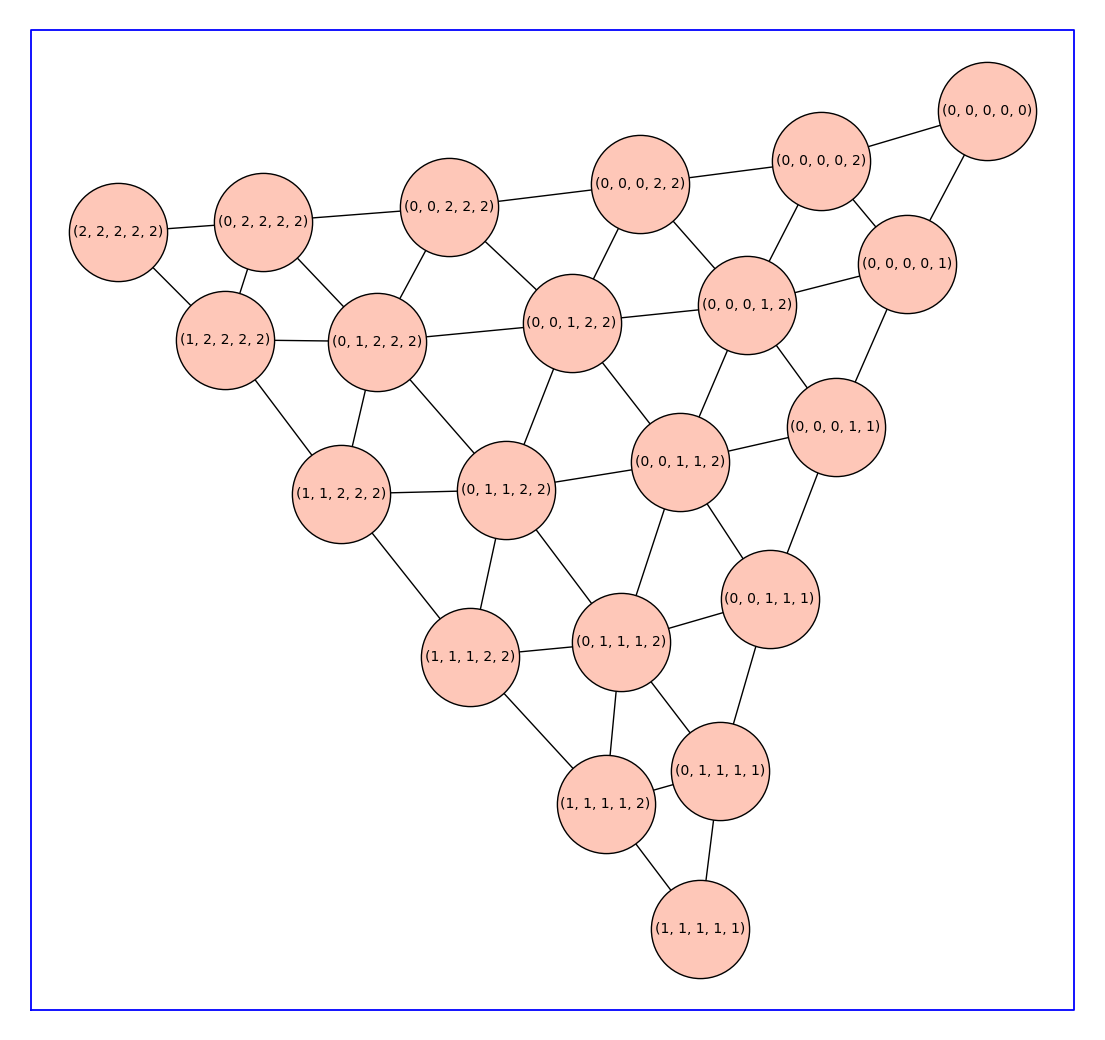

In [34]:
G3 = reduced_Cartesian_power(graphs.CycleGraph(3),5)
G3.show(figsize=14,vertex_size=5000,graph_border=True)